Hunter Bennett  
Glass Lab  
DESeq investigation of LXR RNA Seq Data  
Created 180301 | Last updated 180301
_____
DESeq differential gene calling of LXR knockout mice treated with CCL4 compared to wild type.

In [1]:
# load DESeq2
library(DESeq2)

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Warning message:


In [2]:
# load in files prepared by python worklflow in the notebook 180103_ATAC_DiffPeaks
outdir = '/home/h1bennet/LXR/results/180312_LXRaKO_CCl4/'
col_data = read.csv(paste0(outdir, 'deseq_coldata.txt'), sep='\t')
gene_counts = read.csv(paste0(outdir, 'rnaseq_matrix_condenseGenes_exons_raw_deseq.txt'), sep='\t', row.names=1)

In [3]:
# remove gene column from gene counts
gene_mat = gene_counts[, -ncol(gene_counts)]

In [4]:
# set baseline levels for the categories we will use in our model
col_data$genotype <- relevel(col_data$genotype, ref='C57BL6')


### Run DESeq analysis with interaction term model

In [5]:
dds <- DESeqDataSetFromMatrix(countData = gene_mat,
                             colData = col_data,
                             design = ~group_diet)

converting counts to integer mode


In [6]:
dds <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


### Lets look at the mean-variance relationship in the data

In [7]:
vsd <- vst(dds, blind=FALSE)
rld <- rlog(dds, blind=FALSE)

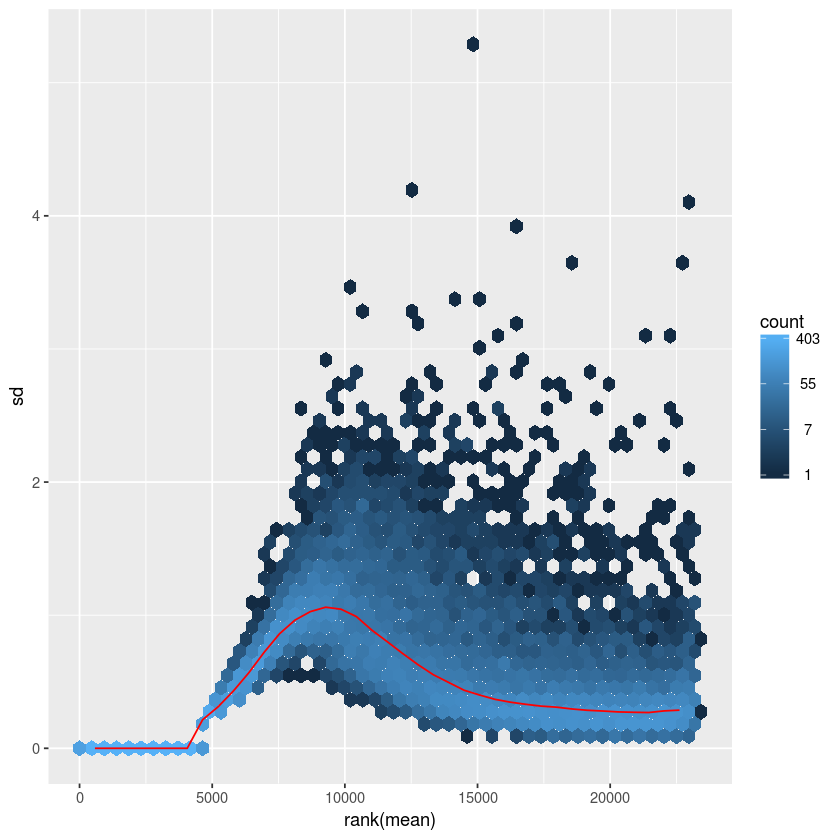

In [8]:
# this gives log2(n + 1)
ntd <- normTransform(dds)
library("vsn")
meanSdPlot(assay(ntd))

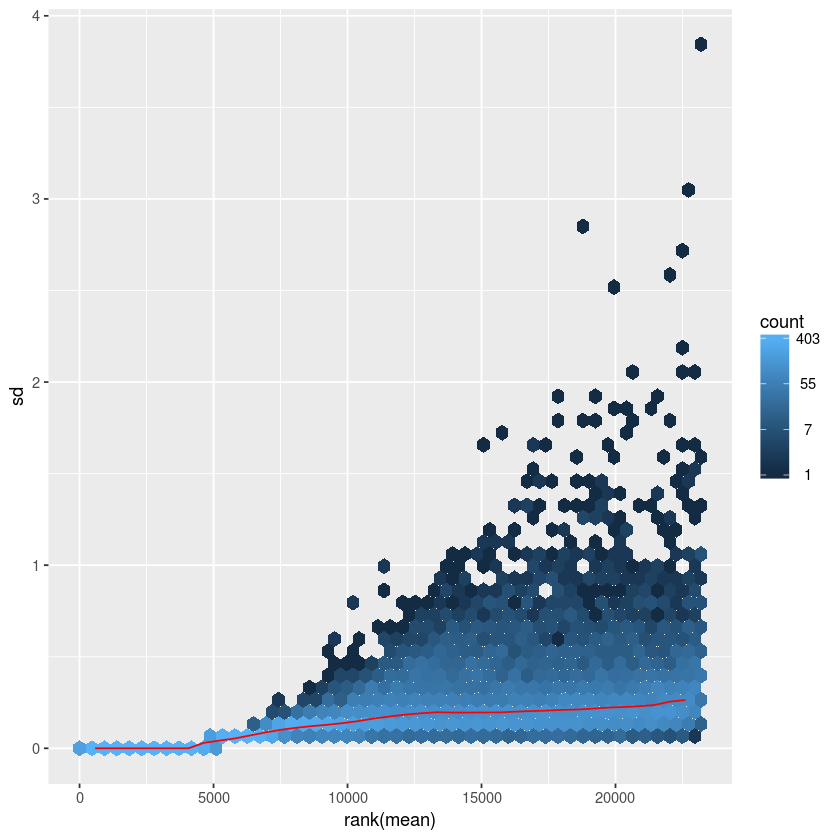

In [9]:
meanSdPlot(assay(vsd))

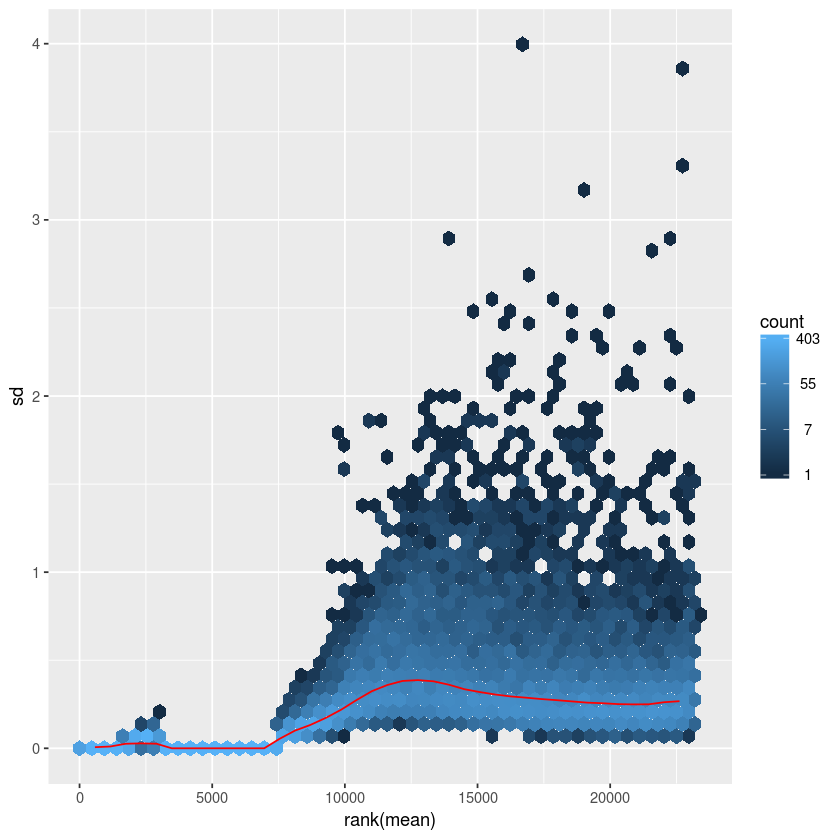

In [10]:
meanSdPlot(assay(rld))

### Lets take a look at the sample distances...

In [11]:
sampleDists <- dist(t(assay(vsd)))

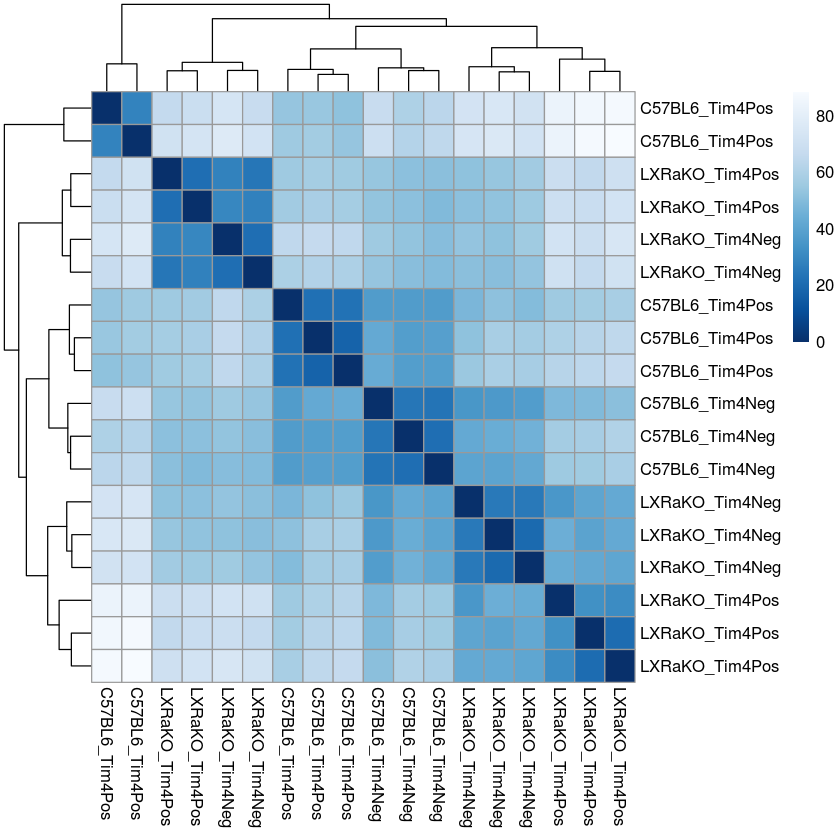

In [12]:
library("RColorBrewer")
library('pheatmap')
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- vsd$group
colnames(sampleDistMatrix) <- vsd$group
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

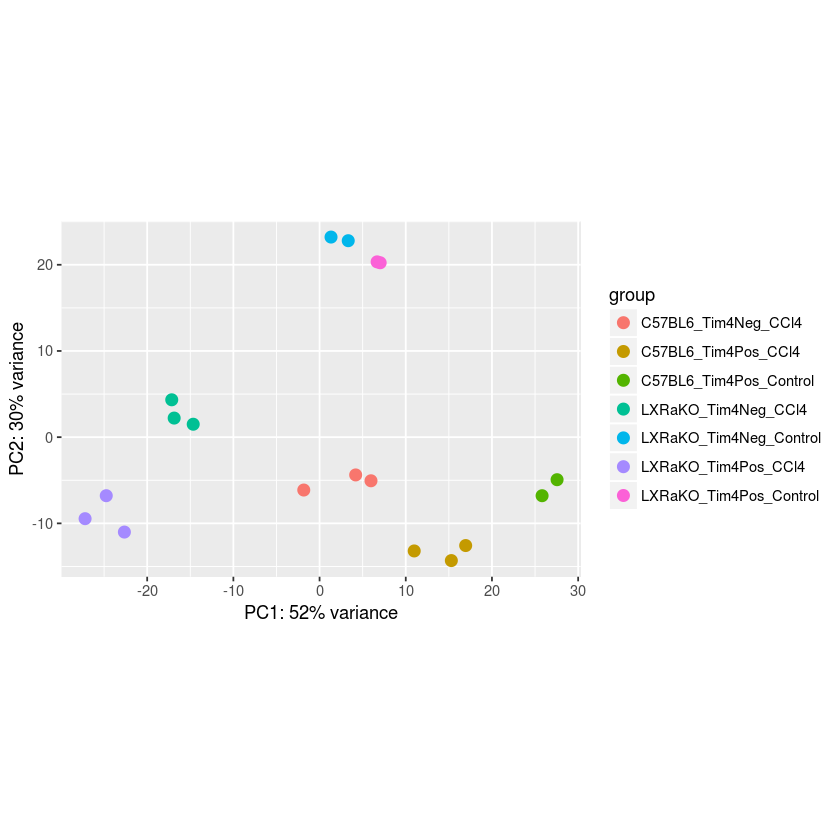

In [13]:
plotPCA(vsd, intgroup=c("group_diet"))


### Now we will do a differential gene analysis

In [7]:
table(col_data$group_diet)


   C57BL6_Tim4Neg_CCl4    C57BL6_Tim4Pos_CCl4 C57BL6_Tim4Pos_Control 
                     3                      3                      2 
   LXRaKO_Tim4Neg_CCl4 LXRaKO_Tim4Neg_Control    LXRaKO_Tim4Pos_CCl4 
                     3                      2                      3 
LXRaKO_Tim4Pos_Control 
                     2 

In [8]:
# diet effect for tim4pos in controls
res <- results(dds, contrast=c('group_diet', 'C57BL6_Tim4Pos_CCl4', 'C57BL6_Tim4Pos_Control'), alpha = 0.1)
res_ordered <- res[order(res$padj), ]
write.table(res_ordered, file = paste0(outdir, "C57_Tim4Pos_CCl4_vs_control_Deseq_results.txt"), sep='\t')

In [17]:
summary(res)


out of 18623 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 3885, 21% 
LFC < 0 (down)   : 3786, 20% 
outliers [1]     : 0, 0% 
low counts [2]   : 3564, 19% 
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



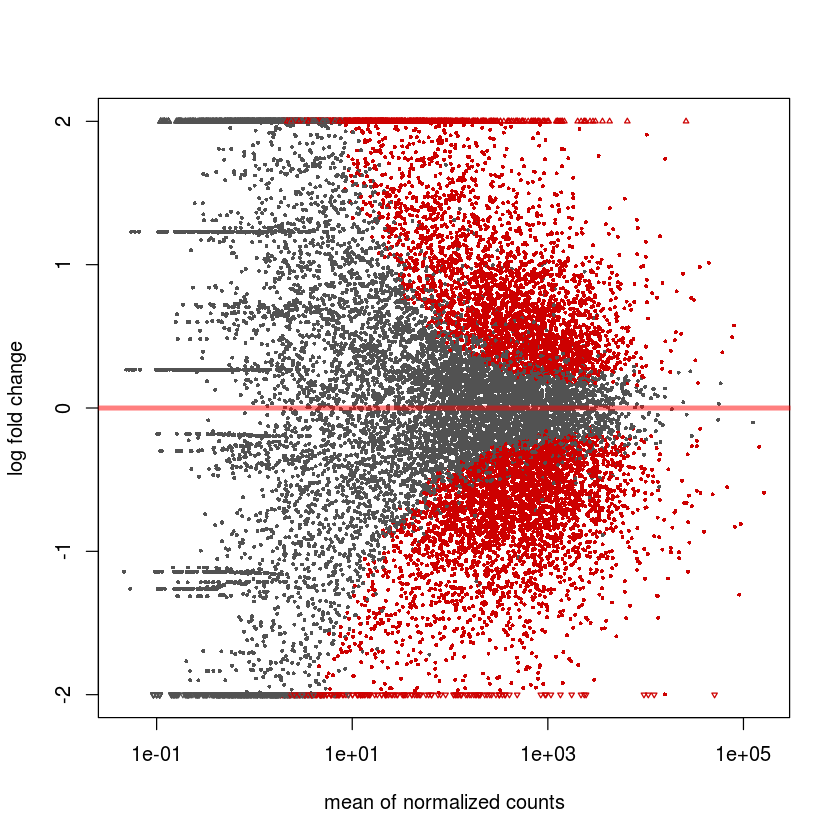

In [18]:
plotMA(res, ylim=c(-2,2))

In [19]:
res <- results(dds, contrast=c('group_diet', 'C57BL6_Tim4Neg_CCl4', 'C57BL6_Tim4Pos_Control'), alpha = 0.1)
res_ordered <- res[order(res$padj), ]
write.table(res_ordered, file = paste0(outdir, "C57_Tim4Neg_CCl4_vs_control_Deseq_results.txt"), sep='\t')

In [20]:
summary(res)


out of 18623 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 4428, 24% 
LFC < 0 (down)   : 4293, 23% 
outliers [1]     : 0, 0% 
low counts [2]   : 2495, 13% 
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



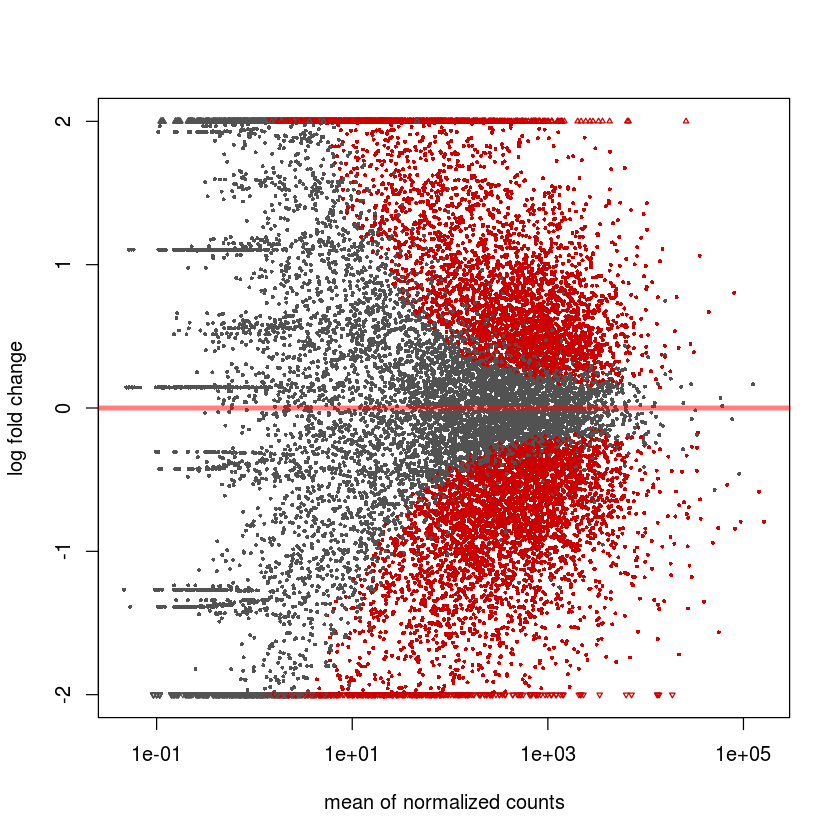

In [21]:
plotMA(res, ylim=c(-2,2))

In [22]:
# diet effect for ncorwt
res <- results(dds, contrast=c('group_diet', 'LXRaKO_Tim4Pos_CCl4', 'C57BL6_Tim4Pos_Control'), alpha = 0.1)
res_ordered <- res[order(res$padj), ]
write.table(res_ordered, file = paste0(outdir, "LXRaKO_Tim4Pos_CCl4_vs_control_Deseq_results.txt"), sep='\t')

In [23]:
summary(res)


out of 18623 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 5061, 27% 
LFC < 0 (down)   : 4450, 24% 
outliers [1]     : 0, 0% 
low counts [2]   : 0, 0% 
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



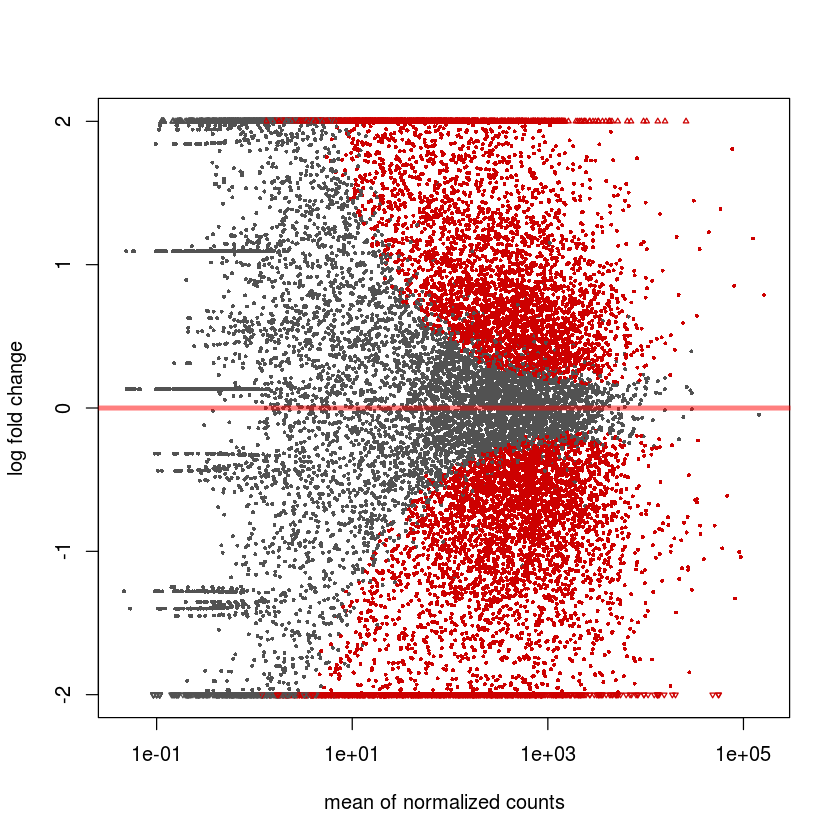

In [24]:
plotMA(res, ylim=c(-2,2))

In [25]:
# diet effect for ncorwt
res <- results(dds, contrast=c('group_diet', 'LXRaKO_Tim4Neg_CCl4', 'C57BL6_Tim4Pos_Control'), alpha = 0.1)
res_ordered <- res[order(res$padj), ]
write.table(res_ordered, file = paste0(outdir, "LXRaKO_Tim4Neg_CCl4_vs_control_Deseq_results.txt"), sep='\t')

In [26]:
summary(res)


out of 18623 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 4405, 24% 
LFC < 0 (down)   : 4288, 23% 
outliers [1]     : 0, 0% 
low counts [2]   : 3208, 17% 
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



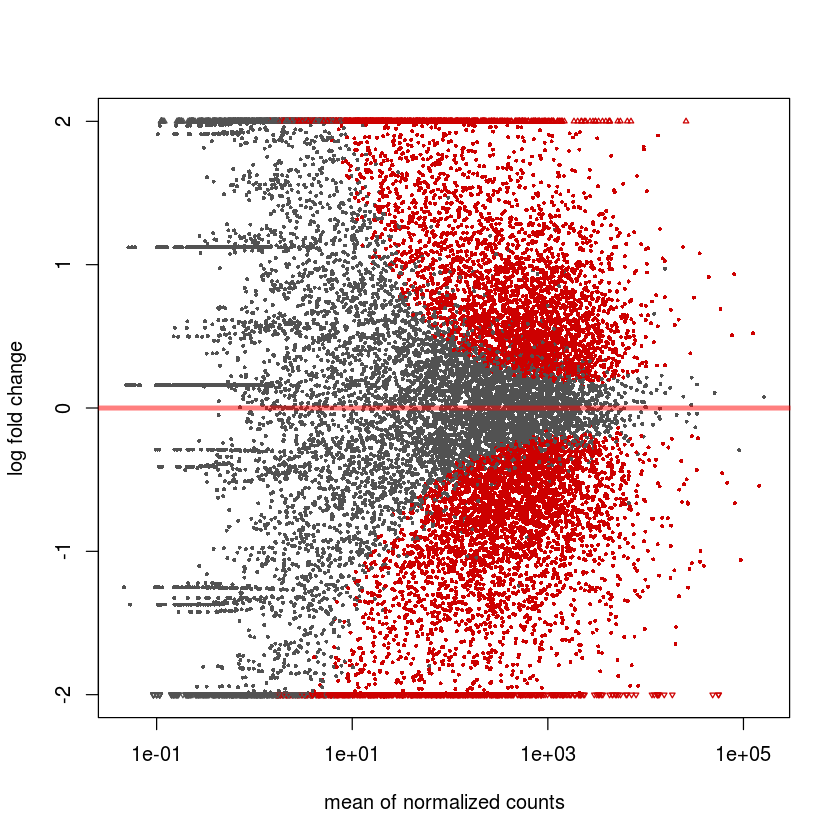

In [27]:
plotMA(res, ylim=c(-2,2))

In [28]:
# compare LXR CCl4 to WT CCL4
res <- results(dds, contrast=c('group_diet', 'LXRaKO_Tim4Pos_CCl4', 'C57BL6_Tim4Pos_CCl4'), alpha = 0.1)
res_ordered <- res[order(res$padj), ]
write.table(res_ordered, file = paste0(outdir, "LXRaKO_Tim4Pos_CCl4_vs_C57BL6_Tim4Pos_CCl4_Deseq_results.txt"), sep='\t')

In [29]:
summary(res)


out of 18623 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 2892, 16% 
LFC < 0 (down)   : 2698, 14% 
outliers [1]     : 0, 0% 
low counts [2]   : 3208, 17% 
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



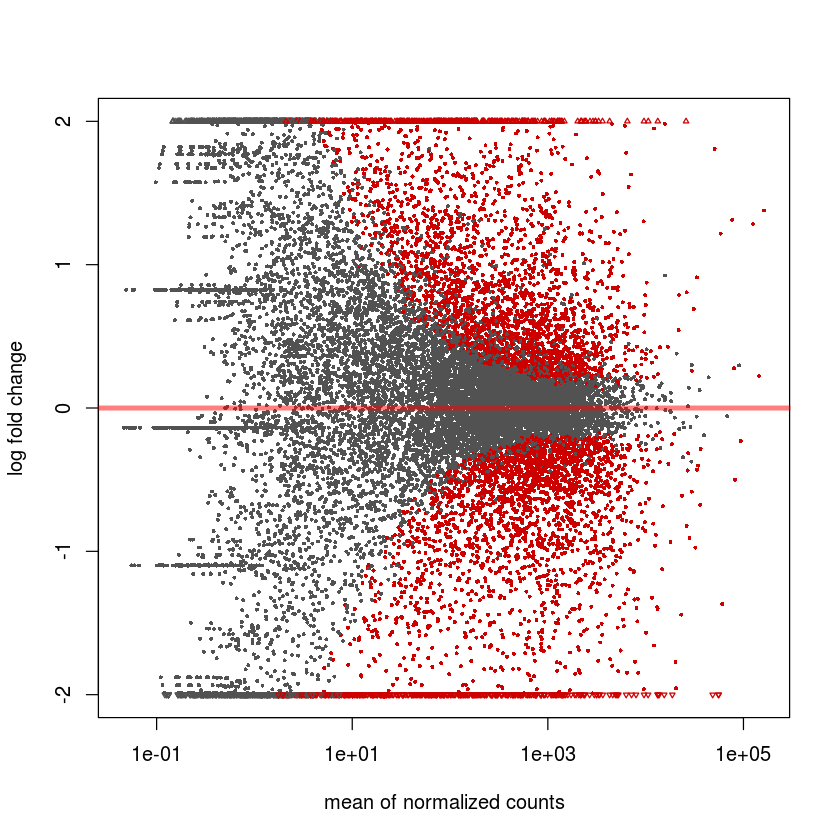

In [30]:
plotMA(res, ylim=c(-2,2))

In [31]:
# compare LXR CCl4 to WT CCL4
res <- results(dds, contrast=c('group_diet', 'LXRaKO_Tim4Neg_CCl4', 'C57BL6_Tim4Neg_CCl4'), alpha = 0.1)
res_ordered <- res[order(res$padj), ]
write.table(res_ordered, file = paste0(outdir, "LXRaKO_Tim4Neg_CCl4_vs_C57BL6_Tim4Neg_CCl4_Deseq_results.txt"), sep='\t')

In [32]:
summary(res)


out of 18623 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 1245, 6.7% 
LFC < 0 (down)   : 1604, 8.6% 
outliers [1]     : 0, 0% 
low counts [2]   : 3208, 17% 
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



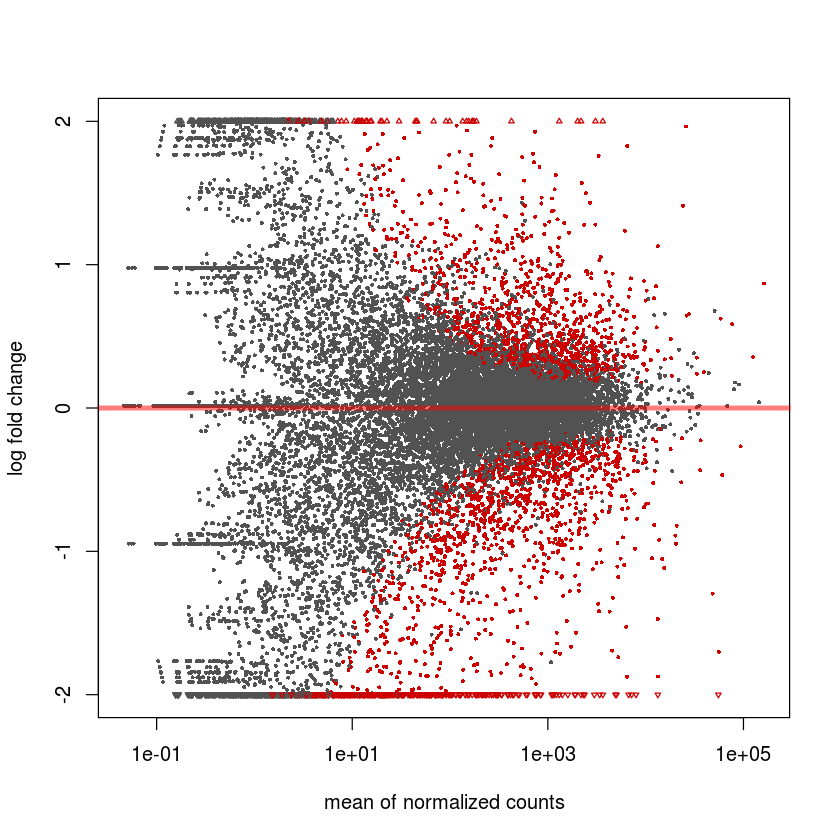

In [33]:
plotMA(res, ylim=c(-2,2))

In [34]:
# compare LXRaKO CCl4 to LXRaKO Control Diet
# compare LXR CCl4 to WT CCL4
res <- results(dds, contrast=c('group_diet', 'LXRaKO_Tim4Pos_CCl4', 'LXRaKO_Tim4Pos_Control'), alpha = 0.1)
res_ordered <- res[order(res$padj), ]
write.table(res_ordered, file = paste0(outdir, "LXRaKO_Tim4Pos_CCl4_vs_LXRaKO_Tim4Pos_Control_Deseq_results.txt"), sep='\t')

In [35]:
summary(res)


out of 18623 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 3623, 19% 
LFC < 0 (down)   : 3313, 18% 
outliers [1]     : 0, 0% 
low counts [2]   : 2851, 15% 
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



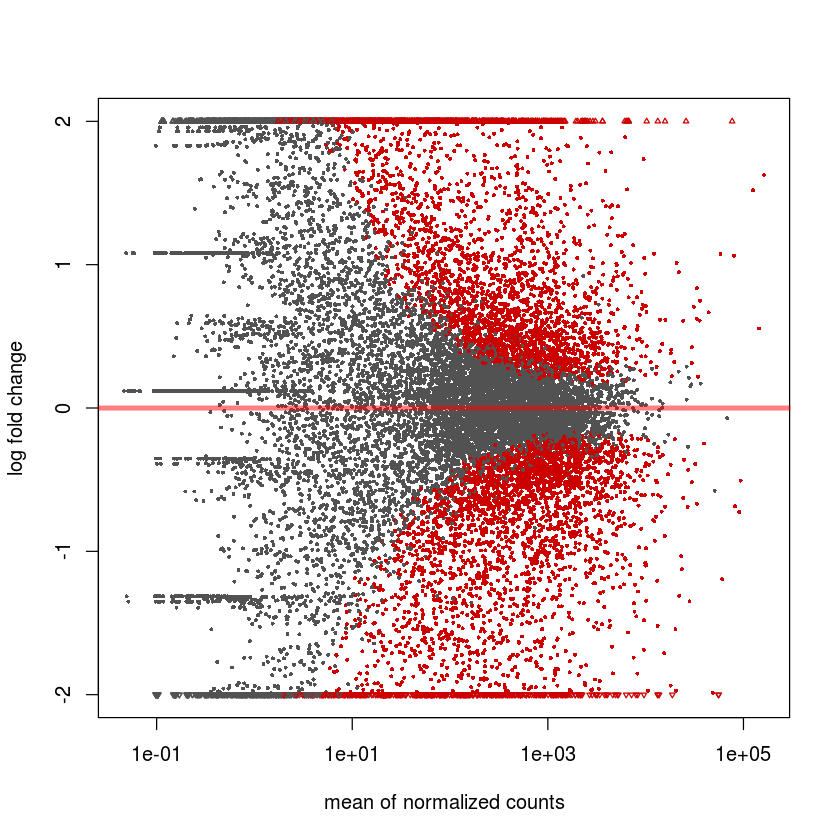

In [36]:
plotMA(res, ylim=c(-2,2))

In [37]:
# compare LXRaKO CCl4 to LXRaKO Control Diet
# compare LXR CCl4 to WT CCL4
res <- results(dds, contrast=c('group_diet', 'LXRaKO_Tim4Neg_CCl4', 'LXRaKO_Tim4Neg_Control'), alpha = 0.1)
res_ordered <- res[order(res$padj), ]
write.table(res_ordered, file = paste0(outdir, "LXRaKO_Tim4Neg_CCl4_vs_LXRaKO_Tim4Neg_Control_Deseq_results.txt"), sep='\t')

In [38]:
summary(res)


out of 18623 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 2924, 16% 
LFC < 0 (down)   : 2751, 15% 
outliers [1]     : 0, 0% 
low counts [2]   : 3920, 21% 
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



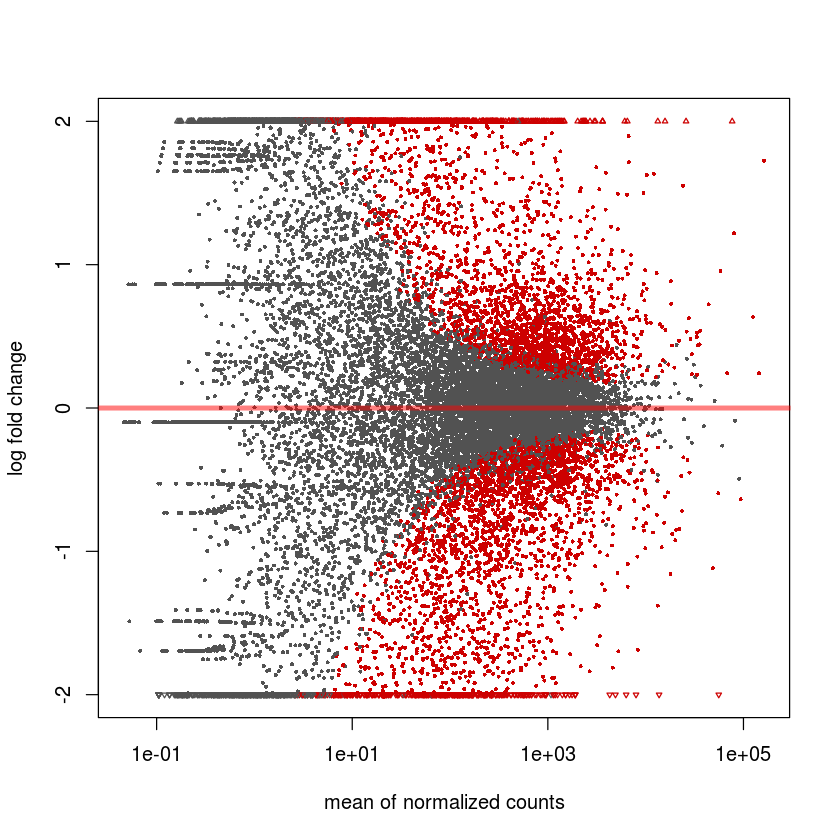

In [39]:
plotMA(res, ylim=c(-2,2))

In [9]:
# compare LXRaKO CCl4 to LXRaKO Control Diet
# compare LXR CCl4 to WT Control
res <- results(dds, contrast=c('group_diet', 'LXRaKO_Tim4Pos_CCl4', 'C57BL6_Tim4Pos_Control'), alpha = 0.1)
res_ordered <- res[order(res$padj), ]
write.table(res_ordered, file = paste0(outdir, "LXRaKO_Tim4Pos_CCl4_vs_C57BL6_Tim4Pos_Control_Deseq_results.txt"), sep='\t')

In [11]:
# compare LXRaKO CCl4 to LXRaKO Control Diet
# compare LXR CCl4 to WT Control
res <- results(dds, contrast=c('group_diet', 'LXRaKO_Tim4Neg_CCl4', 'C57BL6_Tim4Pos_Control'), alpha = 0.1)
res_ordered <- res[order(res$padj), ]
write.table(res_ordered, file = paste0(outdir, "LXRaKO_Tim4Neg_CCl4_vs_C57BL6_Tim4Pos_Control_Deseq_results.txt"), sep='\t')